# Trabajando con medidas centrales
1. Cómo analizar dataframes
2. Overview de los datos
3. Obtener las medidas centrales
4. Analizar graficas

In [ ]:
try:
    from statsmodels import robust
    import wquantiles
except ModuleNotFoundError:
    !pip install statmodels
    !pip install wquantiles
    exit (1)

import pandas as pd
import numpy as np
from scipy.stats import trim_mean
import seaborn as sns
import matplotlib.pyplot as plt

db = pd.read_csv ("/content/state.csv")

6162876.3 4783697.125 4.445833981123393


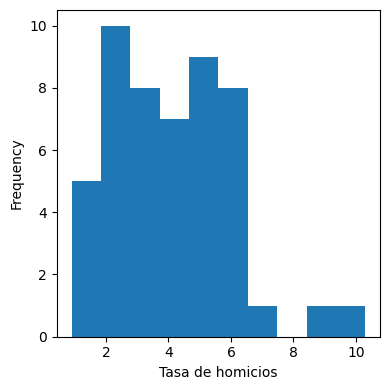

In [ ]:
# Info
db.head (5)
db.tail (4)
db.sample (10)

db.columns
list (db.columns)

# db.info ()
# db.describe ()

# Estimando las atasas de población y asesinatos

media_poblacion = db.Population.mean ()
media_trim = trim_mean (db.Population, 0.1)
promedio_ponderado = np.average (db['Murder.Rate'], weights = db.Population)
print (media_poblacion, media_trim, promedio_ponderado)

# db['Murder.Rate'].plot.line ()
db['Murder.Rate'].plot.bar ()
ax = (db.Population/1000000).plot.hist (figsize = (4, 4))
ax.set_label ("Población [millones]")

ax = db['Murder.Rate'].plot.hist (figsize = (4, 4))
ax.set_xlabel ("Tasa de homicios")

plt.tight_layout ()
plt.show ()

/usr/local/lib/python3.11/dist-packages/seaborn/axisgrid.py:854: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  func(*plot_args, **plot_kwargs)
/usr/local/lib/python3.11/dist-packages/seaborn/distributions.py:2496: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  kdeplot(**{axis: a}, ax=ax, color=kde_color, **kde_kws)
/usr/local/lib/python3.11/dist-packages/seaborn/axisgrid.py:854: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an 

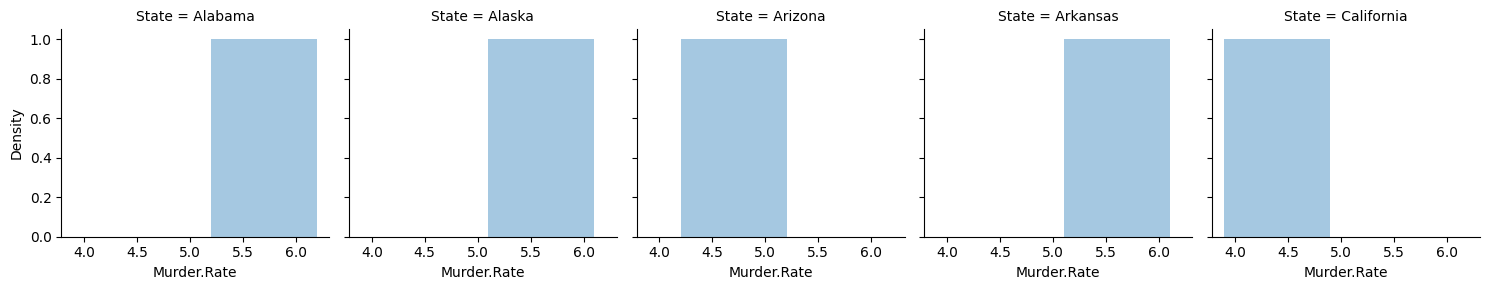

In [45]:
analisis = db.head ()
g = sns.FacetGrid (analisis, col = "State")
g.map (sns.distplot, "Murder.Rate")